# ``aggregate``: Distortions and Pricing Examples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')
import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

In [2]:
# this file is in examples
from importlib import reload
import sys
sys.path.insert(0,'..')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash

uw = trash.Underwriter(debug=False)

# Plan

1. Set up a portfolio
2. Price with several distortions... 

In [ ]:
port = uw('''port BASE
    agg MediumCat	10 claims 	1000 x 0   sev 100 * pareto 2.1 - 100 poisson 
    agg LargeCat	1.7 claims  5000 x 0   sev 500 * pareto 1.4 - 500 poisson 
    agg Attrit		90 claims    200 x 0   sev lognorm 50 cv 3 mixed gamma 0.25
''')

In [ ]:
port

In [ ]:
port.recommend_bucket()

In [ ]:
port.update(13, 2.5, add_exa=True, trim_df=False, remove_fuzz=True)

In [ ]:
port

In [ ]:
port.plot('audit', aspect=1.414)

In [ ]:
cal = port.calibrate_distortions(LRs =[0.86], Ps=[0.98, 0.99, 0.996], r0=0.03)
cal

In [ ]:
A = port.q(0.99)
LR = 0.86 
idx = (A, LR)
dis = agg.Distortion.distortions_from_params(cal, idx, r0=0.03, plot=True)

In [ ]:
dis['convex'] = agg.Distortion.convex_example('cat')
dis['convex'] = agg.Distortion.convex_example('bond')
dis['convex'].plot()

In [ ]:
ans_table, ans_stacked = port.apply_distortions(dis, As=[A], num_plots=0)

In [ ]:
ans_table 


In [ ]:
sns.factorplot(x='method', y='value', row='return', col='line', size=2.5, kind='bar',
                           data=ans_stacked.query(' stat=="lr" ')).set(ylim=(.5, 1.05))

In [ ]:
a, p, test, params, dd, table, stacked = port.uat(Ps=[0.99], LRs=[0.875], r0=0.03, verbose=True)

In [ ]:
port.apply_distortions(dis, As=[A], Ps=[0.99], num_plots=2)

In [ ]:
dis

# Small Medium Large example from 08-28

In [36]:
uw.log2 = 13
uw.update = True 
port2 = uw("SMALL~MEDIUM~LARGE", bs=25000, add_exa=True, trim_df=False, remove_fuzz=True)
port2 

,Large,Medium,Small,total
"(freq, mean)",1000,100,10,1110
"(freq, cv)",0.104881,0.141421,0.331662,0.0953892
"(freq, skew)",0.200227,0.212132,0.361814,0.195118
"(sev, mean)",49813.3,49813.3,498133,53852.2
"(sev, cv)",1.43008,1.43008,1.43008,1.98225
"(sev, skew)",5.03603,5.03603,5.03603,20.5752
"(agg, mean)",4.98133e+07,4.98133e+06,4.98133e+06,5.97759e+07
"(agg, cv)",0.114215,0.201125,0.560815,0.107351
"(agg, skew)",0.21022,0.405612,1.29252,0.254706
Mean,4.98133e+07,4.98133e+06,4.98133e+06,5.97759e+07


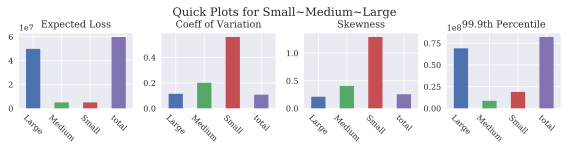

In [4]:
port2.plot('quick')

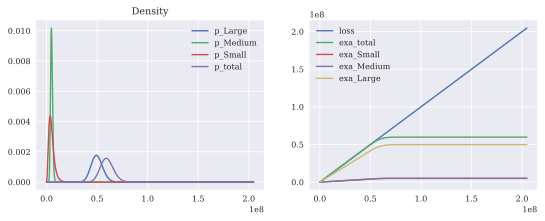

In [38]:
axiter = agg.axiter_factory(None, 2, aspect=1.5, height=3)
port2.plot('density', aspect=1.4, axiter=axiter)
port2.density_df.filter(regex='^exa_[a-zA-Z]+$|loss').plot(ax=next(axiter))

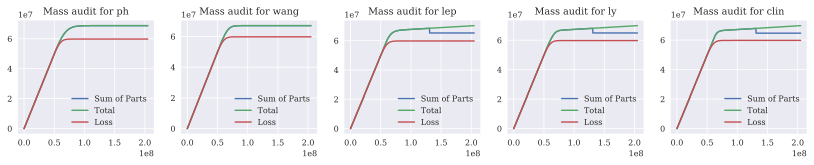

In [44]:
axiter = agg.axiter_factory(None, 5, aspect=1.414)
for d in dd.values():
    ans = port2.apply_distortion(d, axiter, 2)

,loss,S,exa_total,exa_Small,exa_Medium,exa_Large,exag_Small,exag_Medium,exag_Large,exag_sumparts,exag_total,lr_Small,lr_Medium,lr_Large,lr_total,method,return
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,7.069136e+06,5.007448e+06,5.427318e+07,6.634976e+07,6.635287e+07,0.703584,0.993996,0.916963,0.9,ph,50.0
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,6.508846e+06,5.094755e+06,5.474927e+07,6.635287e+07,6.635287e+07,0.764149,0.976962,0.908989,0.9,wang,50.0
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,6.465198e+06,5.099616e+06,5.478805e+07,6.635287e+07,6.635287e+07,0.769308,0.976031,0.908345,0.9,lep,50.0
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,6.405926e+06,5.113950e+06,5.483300e+07,6.635287e+07,6.635287e+07,0.776426,0.973295,0.907601,0.9,ly,50.0
73825000.0,73825000.0,0.019946,5.971759e+07,4.973729e+06,4.977382e+06,4.976648e+07,6.252949e+06,5.131565e+06,5.496836e+07,6.635287e+07,6.635287e+07,0.795421,0.969954,0.905366,0.9,clin,50.0


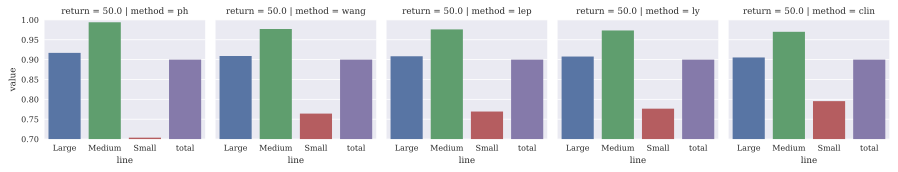

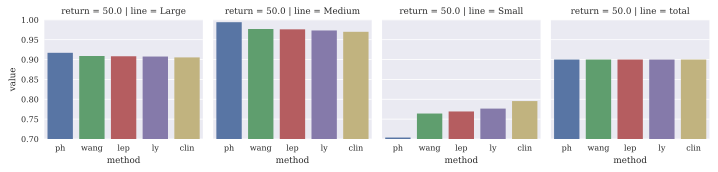

In [45]:
a, p, test, arams, dd, table, stacked = port2.uat(LRs=[0.9], r0=0.025, num_plots=0)

In [47]:
a = a.set_index(['loss', 'S'])
a

exa_total     exa_Small    exa_Medium     exa_Large  \
loss       S                                                                  
73825000.0 0.019946  5.971759e+07  4.973729e+06  4.977382e+06  4.976648e+07   
           0.019946  5.971759e+07  4.973729e+06  4.977382e+06  4.976648e+07   
           0.019946  5.971759e+07  4.973729e+06  4.977382e+06  4.976648e+07   
           0.019946  5.971759e+07  4.973729e+06  4.977382e+06  4.976648e+07   
           0.019946  5.971759e+07  4.973729e+06  4.977382e+06  4.976648e+07   

                       exag_Small   exag_Medium    exag_Large  exag_sumparts  \
loss       S                                                                   
73825000.0 0.019946  7.069136e+06  5.007448e+06  5.427318e+07   6.634976e+07   
           0.019946  6.508846e+06  5.094755e+06  5.474927e+07   6.635287e+07   
           0.019946  6.465198e+06  5.099616e+06  5.478805e+07   6.635287e+07   
           0.019946  6.405926e+06  5.113950e+06  5.483300e+07   6.635287e+07   
           0.019946  6.252949e+06  5.131565e+06  5.496836e+07   6.635287e+07   

                       exag_total  lr_Small  lr_Medium  lr_Large  lr_total  \
loss       S                                                                 
73825000.0 0.019946  6.635287e+07  0.703584   0.993996  0.916963       0.9   
           0.019946  6.635287e+07  0.764149   0.976962  0.908989       0.9   
           0.019946  6.635287e+07  0.769308   0.976031  0.908345       0.9   
           0.019946  6.635287e+07  0.776426   0.973295  0.907601       0.9   
           0.019946  6.635287e+07  0.795421   0.969954  0.905366       0.9   

                    method  return        lr err  
loss       S                                      
73825000.0 0.019946     ph    50.0 -6.883383e-15  
           0.019946   wang    50.0 -2.442491e-15  
           0.019946    lep    50.0 -1.110223e-16  
           0.019946     ly    50.0  5.473400e-14  
           0.019946   clin    50.0  1.110223e-15

In [ ]:
g = dd['ly']
df, au = port2.apply_distortion(g, None)
df.filter(regex='^exag_[A-Za-z]+$').plot(subplots=False, layout=(2,-1), sharey=True)

In [ ]:
df.filter(regex='^exag_[A-Za-z]+$').plot(subplots=True, layout=(1,-1), sharey=True, figsize=(12,3))

In [ ]:
(df.exag_sumparts / df.exag_total - 1).abs().plot(logy=True)

In [ ]:
axiter = agg.axiter_factory(None, 5)

In [ ]:
axiter.n

[Text(0.5,1,'ax 1 later')]

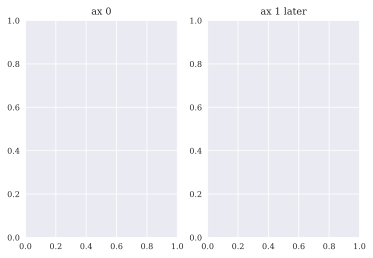

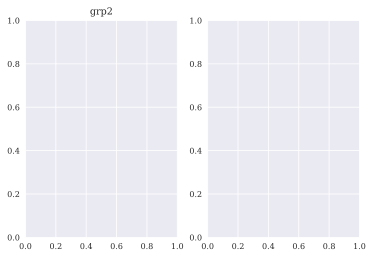

In [18]:
f, ax = plt.subplots(1,2)
ax[0].set(title='ax 0')
f2, ax2 = plt.subplots(1,2)
ax2[0].set(title='grp2')
ax[1].set(title='ax 1 later')


In [16]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D6C3668D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000016D6BE95160>], dtype=object)

# Working with Meta

In [ ]:
uw = agg.Underwriter(glob=globals())

In [ ]:
port = uw('''port BASE
    agg MediumCat	10 claims 	1000 x 0   sev 100 * pareto 2.1 - 100 poisson 
    agg LargeCat	1.7 claims  5000 x 0   sev 500 * pareto 1.4 - 500 poisson 
    agg Attrit		90 claims    200 x 0   sev lognorm 50 cv 3 mixed gamma 0.25
''')
port.update(13, 2.5)
port

In [ ]:
svuc = agg.Severity(port, exp_attachment=5000, exp_limit=15000, conditional=False) # , sev_a=13, sev_b=2.5)
sv_c = agg.Severity(port, exp_attachment=2500, exp_limit=15000, conditional=True) 
sv = agg.Severity(port)

In [ ]:
svuc.moms(), sv_c.moms(), sv.moms(), port.statistics_df.loc[('agg', 'mean'), 'total']

In [ ]:
xs = port.density_df.loss.values
cdf = sv.cdf(xs)
pdf = np.diff(np.hstack((0, cdf)))
plt.plot(xs, pdf, label='approx')

cdf = svuc.cdf(xs)
pdf = np.diff(np.hstack((0, cdf)))
plt.plot(xs, pdf, label='uncond layer')

cdf = sv_c.cdf(xs)
pdf = np.diff(np.hstack((0, cdf)))
plt.plot(xs, pdf, label='cond layer')

plt.plot(xs, port.density_df.p_total, label='port')
plt.yscale('log')
plt.legend()

In [ ]:
p2 = uw('''port MP2
    agg A1 2 claims sev meta.svuc poisson''')

In [ ]:
p2.update(13, 2.5)
p2.plot(kind='density', aspect=2, logy=True)

In [ ]:
port.F(0.001)

In [ ]:
p2